In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [4]:
# Read in the sales_train.csv data
sales_train = pd.read_csv("/Users/macbook/Desktop/Time-Series-Data/sales_train.csv")

# Print the first few rows of the data
print(sales_train.head())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


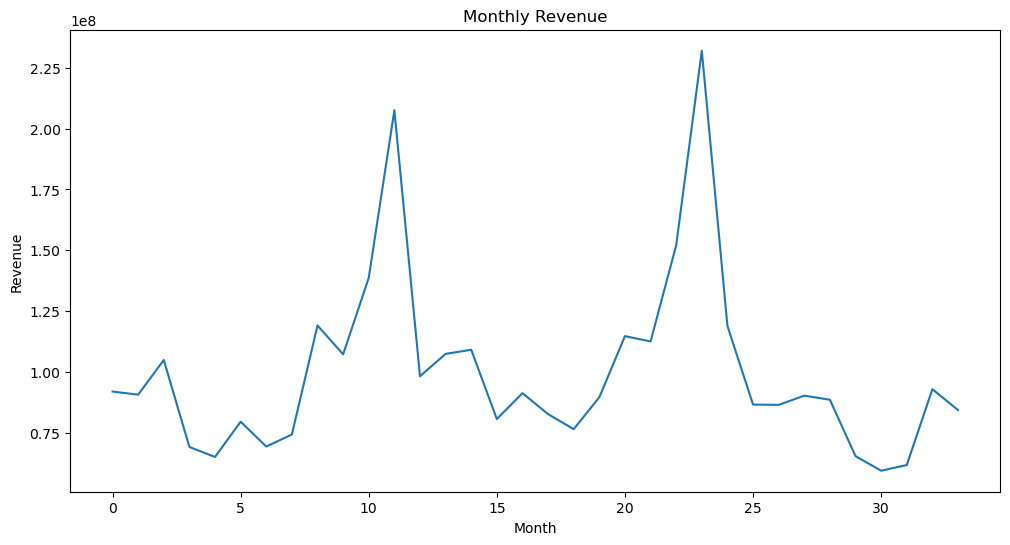

In [5]:

#Checking for missing values
print(sales_train.isnull().sum())

# Create a new column 'revenue' by multiplying item_price and item_cnt_day
sales_train['revenue'] = sales_train['item_price'] * sales_train['item_cnt_day']

# Group the data by date_block_num and sum up the revenue
monthly_revenue = sales_train.groupby('date_block_num')['revenue'].sum()

# Plot the monthly revenue
plt.figure(figsize=(12,6))
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.plot(monthly_revenue)
plt.show()


In [6]:
# Read in the items.csv data
items = pd.read_csv("/Users/macbook/Desktop/Time-Series-Data/items.csv")

# Merge the items data with the sales_train data
sales_train = pd.merge(sales_train, items, on='item_id')

# Group the data by item_category_id and sum up the revenue
category_revenue = sales_train.groupby('item_category_id')['revenue'].sum()

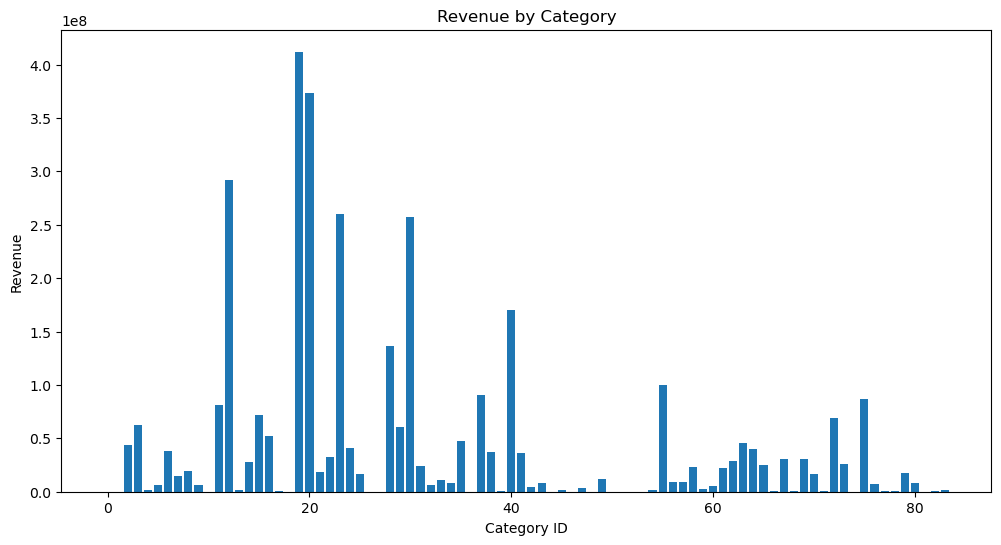

In [7]:
# Plot the revenue by category
plt.figure(figsize=(12,6))
plt.title("Revenue by Category")
plt.xlabel("Category ID")
plt.ylabel("Revenue")
plt.bar(category_revenue.index, category_revenue.values)
plt.show()

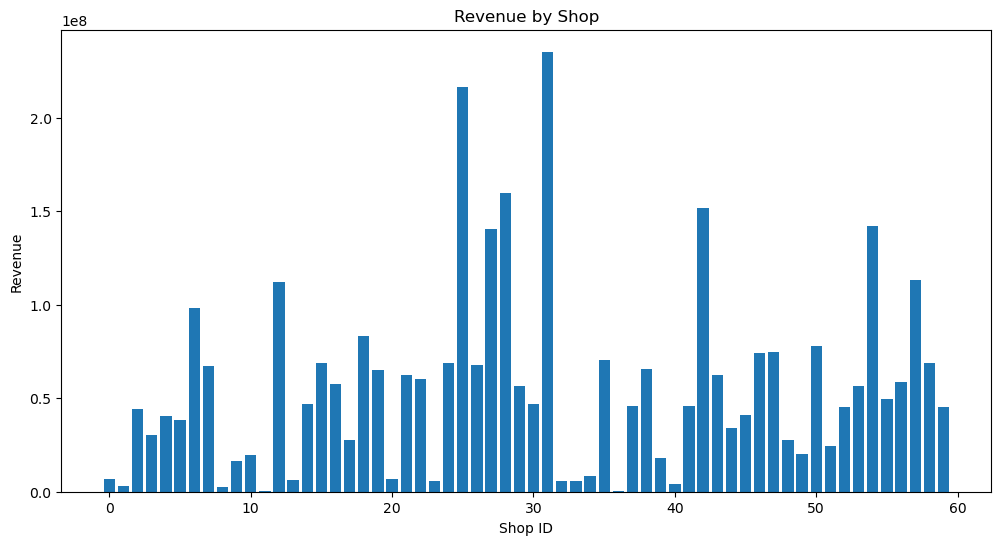

In [8]:
# Group the data by shop_id and sum up the revenue
shop_revenue = sales_train.groupby('shop_id')['revenue'].sum()

# Plot the revenue by shop
plt.figure(figsize=(12,6))
plt.title("Revenue by Shop")
plt.xlabel("Shop ID")
plt.ylabel("Revenue")
plt.bar(shop_revenue.index, shop_revenue.values)
plt.show()


In [9]:
# create pivot table for the data
sales_train_pivot = sales_train.pivot_table(index=['shop_id', 'item_id'], columns='date_block_num', values='item_cnt_day', fill_value=0)

# Save the pivot table to a new csv file
sales_train_pivot.to_csv("sales_train_pivot.csv", index=False)

In [11]:
# Read in the test.csv data
test = pd.read_csv("/Users/macbook/Desktop/Time-Series-Data/test.csv")

# Merge the test data with the pivot table
test = pd.merge(test, sales_train_pivot, on=['shop_id', 'item_id'], how='left')

# Fill any missing values in the pivot table with 0
test.fillna(0, inplace=True)

# Remove the unnecessary columns from the test data
test.drop(['ID', 'shop_id', 'item_id'], axis=1, inplace=True)

# Split the data into train and validation sets
X_train = test.loc[:, : 33]
X_val = test.loc[:, 34:]




TypeError: cannot do slice indexing on Index with these indexers [34] of type int

In [12]:
# Read in the test.csv data
test = pd.read_csv("/Users/macbook/Desktop/Time-Series-Data/test.csv")

# Merge the test data with the pivot table
test = pd.merge(test, sales_train_pivot, on=['shop_id', 'item_id'], how='left')

# Fill any missing values in the pivot table with 0
test.fillna(0, inplace=True)

# Remove the unnecessary columns from the test data
test.drop(['ID', 'shop_id', 'item_id'], axis=1, inplace=True)

# Split the data into train and validation sets
X_train = test.iloc[:, :33]
X_val = test.iloc[:, 33:]


In [14]:
conda install -c anaconda scikit-learn


Solving environment: done

## Package Plan ##

  environment location: /Users/macbook/opt/anaconda3/envs/arima-forecast

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.6.15          |   py38hecd8cb5_0         157 KB  anaconda
    joblib-1.1.0               |     pyhd3eb1b0_0         211 KB  anaconda
    scikit-learn-1.0.2         |   py38hae1ba45_1         7.0 MB  anaconda
    threadpoolctl-2.2.0        |     pyh0d69192_0          16 KB  anaconda
    ------------------------------------------------------------
                                           Total:         7.4 MB

The following NEW packages will be INSTALLED:

  joblib             anaconda/noarch::joblib-1.1.0-pyhd3eb1b0_0 
  scikit-learn       anaconda/osx-64::scikit-learn-1.0.2-py38hae1ba45_1 
  threadpoolctl      anaconda/noarch::threadpoolctl-2.2.0-pyh0d69192_0 



In [15]:
# Convert the data to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)

# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


ValueError: X has 1 features, but MinMaxScaler is expecting 33 features as input.

In [17]:
print(sales_train_pivot.dtypes)
sales_train_pivot = sales_train_pivot.astype(float)


date_block_num
shop_id      int64
item_id      int64
0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
8          float64
9          float64
10         float64
11         float64
12         float64
13         float64
14         float64
15         float64
16         float64
17         float64
18         float64
19         float64
20         float64
21         float64
22         float64
23         float64
24         float64
25         float64
26         float64
27         float64
28         float64
29         float64
30         float64
31         float64
32         float64
33         float64
dtype: object


In [19]:
# Check the shape of the pivot table
print(sales_train_pivot.shape)

#Check for missing values
print(sales_train_pivot.isnull().sum())

# Fill any missing values in the pivot table with 0
sales_train_pivot.fillna(0, inplace=True)

#Check for missing values after filling
print(sales_train_pivot.isnull().sum())

# Reset the index 
sales_train_pivot = sales_train_pivot.reset_index()

# Split the data into train and validation sets
X_train = sales_train_pivot.iloc[:, 3:36]
X_val = sales_train_pivot.iloc[:, 36:]

# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


(424124, 36)
date_block_num
shop_id    0
item_id    0
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
31         0
32         0
33         0
dtype: int64
date_block_num
shop_id    0
item_id    0
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
31         0
32         0
33         0
dtype: i

ValueError: X has 1 features, but MinMaxScaler is expecting 33 features as input.

In [18]:
sales_train_pivot

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0.0,30.0,0.0,3.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,31.0,0.0,1.571429,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,32.0,1.5,1.428571,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,33.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,35.0,1.0,1.272727,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59.0,22154.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424120,59.0,22155.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424121,59.0,22162.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
424122,59.0,22164.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
# Check the number of columns in the pivot table
print(sales_train_pivot.shape[1])

# Reset the index 
sales_train_pivot = sales_train_pivot.reset_index()

# Split the data into train and validation sets
X_train = sales_train_pivot.iloc[:, 3:36]
X_val = sales_train_pivot.iloc[:, 36:]

# Print the number of columns in X_train and X_val
print(X_train.shape[1])
print(X_val.shape[1])

# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


37
33
2


/Users/macbook/opt/anaconda3/envs/arima-forecast/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/opt/anaconda3/envs/arima-forecast/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: X has 2 features, but MinMaxScaler is expecting 33 features as input.

In [21]:
# Check the number of columns in the pivot table
print(sales_train_pivot.shape[1])

# Split the data into train and validation sets
X_train = sales_train_pivot.iloc[:, :33]
X_val = sales_train_pivot.iloc[:, 33:]

# Print the number of columns in X_train and X_val
print(X_train.shape[1])
print(X_val.shape[1])

# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


38
33
5


/Users/macbook/opt/anaconda3/envs/arima-forecast/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/opt/anaconda3/envs/arima-forecast/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: X has 5 features, but MinMaxScaler is expecting 33 features as input.

In [22]:
# Check the number of columns in the pivot table
print(sales_train_pivot.shape[1])

# Split the data into train and validation sets
X_train = sales_train_pivot.iloc[:, :33]
X_val = sales_train_pivot.iloc[:, 33:]

# Print the number of columns in X_train and X_val
print(X_train.shape)
print(X_val.shape)

# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


38
(424124, 33)
(424124, 5)


/Users/macbook/opt/anaconda3/envs/arima-forecast/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/opt/anaconda3/envs/arima-forecast/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: X has 5 features, but MinMaxScaler is expecting 33 features as input.

In [23]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Read in the train.csv data
train = pd.read_csv("/Users/macbook/Desktop/Time-Series-Data/train.csv")

# Pivot the train data to get the sales for each shop and item
sales_train_pivot = train.pivot_table(index=['shop_id', 'item_id'], columns='date_block_num', values='item_cnt_day', aggfunc='sum')

# Check the number of columns in the pivot table
print(sales_train_pivot.shape[1])

# check for missing values
print(sales_train_pivot.isnull().sum())

# fill missing values with 0
sales_train_pivot.fillna(0, inplace=True)

# check for missing values after filling
print(sales_train_pivot.isnull().sum())

# reset the index
sales_train_pivot = sales_train_pivot.reset_index()

# split the data into train and validation sets
X_train = sales_train_pivot.iloc[:, 3:36]
X_val = sales_train


FileNotFoundError: [Errno 2] No such file or directory: '/Users/macbook/Desktop/Time-Series-Data/train.csv'